In [15]:
from konlpy.tag import Twitter, Kkma
from gensim.models.word2vec import Word2Vec
from copy import deepcopy
import re
import os
from datetime import datetime
t=Twitter()



In [16]:
TXT_PATH = './txt2/'
SAVE_PATH='./korea_wv/'

def get_filelist(path):
    filelist=[]
    files = os.listdir(TXT_PATH) # txt파일에 있는 파일 리스트를 가져옴
    for file in files:
        ext = os.path.splitext(file)[-1]
            
        if ext == '.txt':
            filelist.append("%s%s" % (path, file))
    return filelist


def open_file(file):
    txt_file = open(file, encoding='utf-8')
    content = txt_file.read()
    txt_file.close()
    return content

def preprocessing(content):
    content = re.sub('\\xa0', '', content)
    content = re.sub('\\n', '', content)
    content = re.sub('\\\\xa0', '', content)
    content = re.sub('\\\\n', '', content)
    content = re.sub('[\{\}\[\]\/?.,;:|\)*~`!^\-_+<>@#$%&\\\=\(\'\")]', '', content)
    content = ' '.join(content.split())
                     
    return content

def wv_update(file):
    new_token=[]
    content.append(preprocessing(open_file(TXT_PATH+file)))
    
    
    new_token=[tokenize(d) for d in content]
    
    wv_model_ko.build_vocab(new_token, update=True)
    wv_model_ko.train(new_token, total_examples=wv_model_ko.corpus_count, epochs=wv_model_ko.epochs)
    wv_model_ko.init_sims(replace=True)
    now=datetime.now()
    wv_model_ko.save('%s%s%s%s%s%s' % (SAVE_PATH, now.year, now.month, now.day, now.hour, now.minute))

In [17]:
filelist=get_filelist(TXT_PATH)
len(filelist)

120

In [18]:
%%time
def tokenize(doc):
    return ['/'.join(t) for t in t.pos(doc, norm=True, stem=True)]

content=[]
for file in filelist:
    content.append(preprocessing(open_file(file))) #content리스트 하나에 하나의 논문

sentences = [tokenize(d) for d in content]  #논문 하나가 한 리스트에 토큰화

Wall time: 1min 14s


In [19]:
len(sentences)

120

In [7]:
sentences

[['1930/Number',
  '년대/Noun',
  '장편소설/Noun',
  '에/Josa',
  '나타나다/Verb',
  '고향/Noun',
  '의식/Noun',
  '이기영/Noun',
  '『/Foreign',
  '고향/Noun',
  '』/Foreign',
  '강경애/Noun',
  '『/Foreign',
  '인간/Noun',
  '문제/Noun',
  '』/Foreign',
  '한설야/Noun',
  '『/Foreign',
  '황혼/Noun',
  '』/Foreign',
  '을/Josa',
  '중심/Noun',
  '으로/Josa',
  'A/Alpha',
  'Study/Alpha',
  'on/Alpha',
  'the/Alpha',
  'Consciousness/Alpha',
  'of/Alpha',
  'Home/Alpha',
  'in/Alpha',
  'the/Alpha',
  'Novel/Alpha',
  'of/Alpha',
  'the/Alpha',
  '1930/Number',
  's/Alpha',
  'In/Alpha',
  'the/Alpha',
  'Lee/Alpha',
  'Ki/Alpha',
  'YoungKOHYANG/Alpha',
  '고향/Noun',
  'Gang/Alpha',
  'Keong/Alpha',
  'Ae/Alpha',
  'INKAN/Alpha',
  'MOONJE/Alpha',
  '인간/Noun',
  '문제/Noun',
  'Han/Alpha',
  'Seol/Alpha',
  'Ya/Alpha',
  'HWANGHON/Alpha',
  '황혼/Noun',
  '저자/Noun',
  'Authors/Alpha',
  '우수영/Noun',
  'Woo/Alpha',
  'SooYoung/Alpha',
  '출처/Noun',
  'Source/Alpha',
  '국어/Noun',
  '국문학/Noun',
  '164/Number',
  '20138/Number',
  '5195

In [8]:
%%time
wv_model_ko = Word2Vec(sentences, size=100, window = 8, min_count=10, workers=4, iter=100, sg=1)
#100차원 벡터, 주변단어 2개 참조, 출연빈도 20번이상, CPU 쿼드코어, 100번 반복, CBOW, Skip-Gram중 후자
now=datetime.now()
wv_model_ko.save('%s%s%s%s%s%s' % (SAVE_PATH, now.year, now.month, now.day, now.hour, now.minute))

Wall time: 7min 39s


In [11]:
wv_model_ko.corpus_count

120

In [12]:
len(wv_model_ko.wv.vocab)

7425

In [13]:
wv_model_ko.wv[tokenize('사전')]

array([[ 0.12422128,  0.18662366,  0.5051111 ,  0.19732974, -0.07166692,
         0.05435336, -0.19053118,  0.28422174,  0.6327227 ,  0.34163442,
         0.08975108, -0.7329728 ,  0.064441  ,  0.31273237,  0.49917525,
         0.6982693 , -0.5784901 ,  0.3188292 ,  0.3996951 , -0.1116656 ,
         0.5550475 , -0.16553245,  0.81305045, -0.08232947, -0.44488728,
         0.13388453, -0.5281646 , -0.1608882 ,  0.41490912, -0.0153228 ,
        -0.1313015 , -0.48465446, -0.46980813,  0.14452526, -0.3251017 ,
         0.4258462 , -0.18420725, -0.15472516, -0.31363347, -0.22986792,
         0.69759434, -0.35290346, -0.18211842, -0.66984457, -0.58670026,
        -0.27145576, -0.2556219 , -0.71564436,  0.0327939 ,  0.13305315,
         0.13420448,  0.48089802, -0.66565984, -0.2793832 ,  0.5481548 ,
        -0.2679951 ,  0.42633256,  0.5025986 ,  0.04716899,  0.00412977,
         0.5059902 , -0.65520513, -0.37536925,  0.13751064,  0.16727474,
         0.02466379, -0.18224792,  0.5771065 ,  0.1

In [14]:
wv_model_ko.wv.most_similar(tokenize('엄마'))

[('오빠/Noun', 0.5682154297828674),
 ('밀/Noun', 0.5480400919914246),
 ('아빠/Noun', 0.5437586307525635),
 ('죄책감/Noun', 0.5130934715270996),
 ('소녀/Noun', 0.507477879524231),
 ('토끼/Noun', 0.4733560085296631),
 ('손/Noun', 0.46756234765052795),
 ('할아버지/Noun', 0.46177852153778076),
 ('골/Noun', 0.44976601004600525),
 ('가만히/Adverb', 0.43882352113723755)]

In [67]:
wv_model_ko.wv.similarity(*tokenize('소설 문학'))

0.3797624055748172

In [39]:
wv_model_ko.predict_output_word(tokenize('프로테오믹스'))

[('Aspects/Alpha', 0.00012241668),
 ('constructed/Alpha', 0.00012238866),
 ('Institute/Alpha', 0.00012186042),
 ('textbook/Alpha', 0.00012081459),
 ('common/Alpha', 0.00012002753),
 ('literaryworks/Alpha', 0.00011982793),
 ('theoretical/Alpha', 0.000119679244),
 ('letter/Alpha', 0.00011958796),
 ('morphemes/Alpha', 0.00011956292),
 ('convergence/Alpha', 0.00011943687)]

In [48]:
from matplotlib import font_manager, rc
font_fname='c:/windows/fonts/H2GTRM.TTF'
font_name=font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import nltk


from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

C:\Users\DW\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:22: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


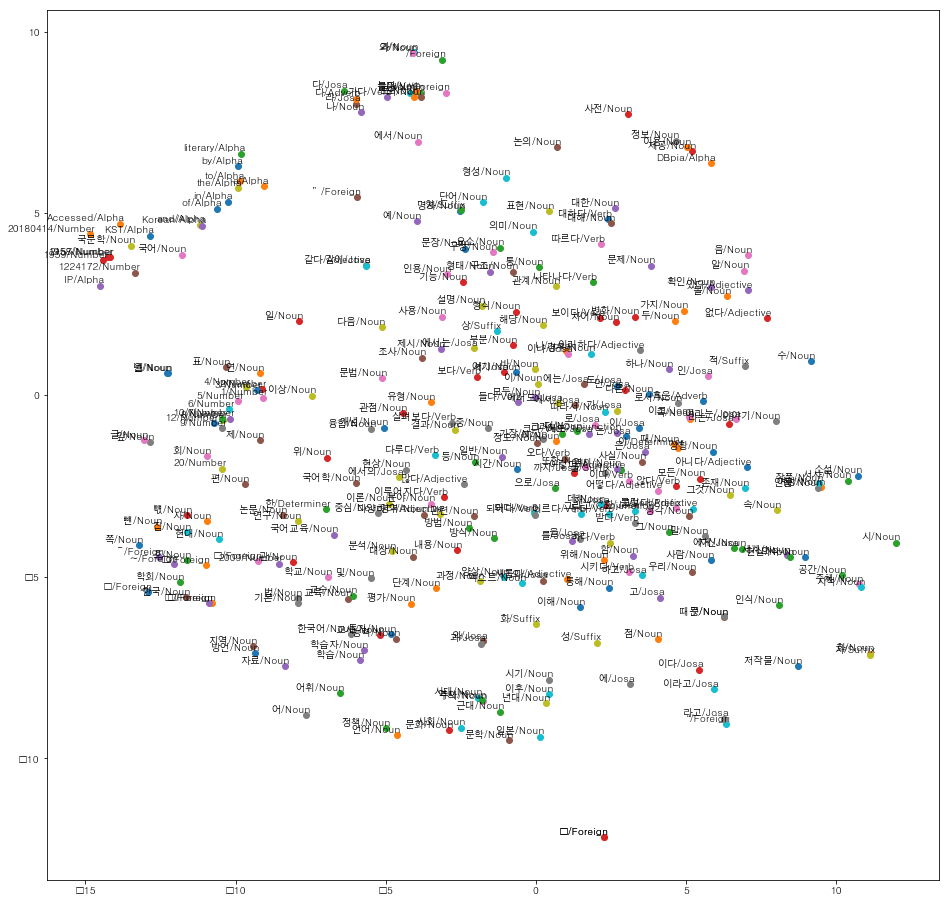

Wall time: 16 s


In [49]:
%%time
tsne_plot(wv_model_ko)

In [37]:
non=open('./txt/생식생물학에서_프로테오믹스의_응용.txt', encoding='utf-8').read()

content2=[]

content2.append(preprocessing(non)) #content리스트 하나에 하나의 논문

non_ko = [tokenize(d) for d in content2]  #논문 하나가 한 리스트에 토큰화

non_ko

[['생식/Noun',
  '생물학/Noun',
  '에서/Josa',
  '프로/Noun',
  '테오/Noun',
  '믹스/Noun',
  '의/Josa',
  '응용/Noun',
  'Potential/Alpha',
  'Importance/Alpha',
  'of/Alpha',
  'Proteomics/Alpha',
  'in/Alpha',
  'Research/Alpha',
  'of/Alpha',
  'Reproductive/Alpha',
  'Biology/Alpha',
  '저자/Noun',
  'Authors/Alpha',
  '출처/Noun',
  'Source/Alpha',
  '김/Noun',
  '호승/Noun',
  '윤용/Noun',
  '달/Noun',
  'HoSeung/Alpha',
  'Kim/Alpha',
  'YongDal/Alpha',
  'Yoon/Alpha',
  '발생/Noun',
  '과/Josa',
  '생식/Noun',
  '81/Number',
  '20046/Number',
  '19/Number',
  '9/Number',
  'pagesDevelopmant/Alpha',
  'Reproduction/Alpha',
  '81/Number',
  '20046/Number',
  '19/Number',
  '9/Number',
  'pagesPublisher/Alpha',
  '한국/Noun',
  '발생생물학/Noun',
  '회/Noun',
  'The/Alpha',
  'Korea/Alpha',
  'Society/Alpha',
  'Of/Alpha',
  'Developmental/Alpha',
  'BiologyURLhttpwwwdbpiacokrArticleNODE/Alpha',
  '00557235/Number',
  'APA/Alpha',
  'Style/Alpha',
  '김/Noun',
  '호승/Noun',
  '윤용/Noun',
  '달/Noun',
  '2004/Number',
  '생

In [36]:
content2

['생물정보학기반 치쿤구니아 바이러스 항원결정부위의 예측Prediction of Epitope for Chikungunya Virus based on Bioinformatics저자Authors이지후 김학용Jihoo Lee Hak Yong Kim출처Source한국콘텐츠학회 종합학술대회 논문집 201411 5556 2 pages발행처Publisher한국콘텐츠학회The Korea Contents SocietyURLhttpwwwdbpiacokrArticleNODE02500941APA Style이지후 김학용 2014 생물정보학기반 치쿤구니아 바이러스 항원결정부위의 예측 한국콘텐츠학회 종합학술대회논문집 5556이용정보Accessed122417220180411 1938 KST저작권 안내DBpia에서 제공되는 모든 저작물의 저작권은 원저작자에게 있으며 누리미디어는 각 저작물의 내용을 보증하거나 책임을 지지 않습니다 그리고 DBpia에서 제공되는 저작물은 DBpia와 구독계약을 체결한 기관소속 이용자 혹은 해당 저작물의 개별 구매자가 비영리적으로만 이용할 수 있습니다 그러므로 이에 위반하여 DBpia에서 제공되는 저작물을 복제 전송 등의 방법으로 무단 이용하는 경우 관련 법령에 따라 민 형사상의 책임을 질 수 있습니다Copyright InformationCopyright of all literary works provided by DBpia belongs to the copyright holdersand Nurimedia does not guarantee contents of the literary work or assume responsibility for thesame In addition the literary works provided by DBpia may only be used by the users affiliated to the institutions which executed a subscription agreement with DBpia or theindiv